This notebook is to help develop my 16831 reinforcement learning project

### Easy copy/paste onto remote machine to parallelize runs

In [2]:
import gym
import ffmpeg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import torch

from datetime import datetime as dt
from PIL import Image

from stable_baselines3 import PPO, DQN
from stable_baselines3.common.atari_wrappers import WarpFrame, NoopResetEnv

from gym import spaces

### Experimentation

In [3]:
env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', obs_type='rgb')
# env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', obs_type='grayscale')

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


In [5]:
obs_space = env.observation_space
action_space = env.action_space

In [6]:
obs_space.shape

(210, 160, 3)

In [7]:
obs_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [8]:
action_space

Discrete(9)

In [9]:
env.action_space = spaces.Discrete(5,)

In [10]:
env.action_space

Discrete(5)

### Training

In [11]:
class LongevityRewardsWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        # Set all action rewards to 1
        return 1

In [12]:
class BonusRewardsWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
        
    def reward(self, reward):
        # Boost bonuses to incentivize seeking them out
        if reward > 10:
            reward = reward * 10
        return reward
    
class ExtremeRewardsWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
        
    def reward(self, reward):
        # Heavily boost bonuses to incentivize seeking them out
        if reward > 10:
            reward = reward * 100
        return reward

In [13]:
def setup_dirs(logging_base_path: str, include_subfolders: bool):
    
    # Create folder to store trajectories
    timestamp = dt.strftime(dt.now(), '%Y%m%d_%H%M%S')
    logging_path = os.path.join(logging_base_path, timestamp)
    os.mkdir(logging_path)
    
    if include_subfolders:
        os.mkdir(os.path.join(logging_path, 'images'))
    
    return logging_path

In [14]:
# env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', frameskip=1, obs_type='rgb')
env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', frameskip=1, obs_type='rgb')

In [15]:
# wrapped_env = WarpFrame(env=env)
# wrapped_env = WarpFrame(env=env, width=210, height=160)
# wrapped_env = LongevityRewardsWrapper(env)
# wrapped_env = BonusRewardsWrapper(env)
# wrapped_env = ExtremeRewardsWrapper(env)
# wrapped_env = NoopResetEnv(env=env, noop_min=265, noop_max=365)
# wrapped_env = NoopResetEnv(env=env, noop_min=265, noop_max=465)
# wrapped_env = NoopResetEnv(env=env, noop_min=265, noop_max=565)
env.action_space = spaces.Discrete(5,)

In [16]:
# model = PPO('CnnPolicy', env, verbose=2, tensorboard_log='ppo_model_log')
model = DQN('CnnPolicy', env, buffer_size=50000, verbose=2, tensorboard_log='dqn_model_log_test')

# model = DQN('MlpPolicy', wrapped_env, buffer_size=50000, verbose=2, tensorboard_log='dqn_model_log_gray')
# model = DQN('CnnPolicy', wrapped_env, buffer_size=50000, verbose=2, tensorboard_log='dqn_log_cnn_gray')
# model = PPO('CnnPolicy', wrapped_env, verbose=2, tensorboard_log='ppo_log_cnn_gray')
# model = DQN('CnnPolicy', wrapped_env, buffer_size=50000, verbose=2, tensorboard_log='dqn_gray_fullres')
# model = PPO('CnnPolicy', wrapped_env, verbose=2, tensorboard_log='ppo_gray_fullres')

# model = DQN('CnnPolicy', wrapped_env, buffer_size=50000, verbose=2, tensorboard_log='dqn_longevity')
# model = PPO('CnnPolicy', wrapped_env, verbose=2, tensorboard_log='ppo_longevity')

# model = DQN('CnnPolicy', wrapped_env, buffer_size=50000, verbose=2, tensorboard_log='dqn_noop_test')

# model = DQN('CnnPolicy', wrapped_env, buffer_size=25000, verbose=2, tensorboard_log='dqn_short')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [16]:
# model.learn(1000000, eval_log_path='ppo_model_log_eval')
# model.learn(1000000, eval_log_path='dqn_model_log_eval_test')
# model.learn(1000000, eval_log_path='dqn_log_eval_cnn_gray')
# model.learn(1000000, eval_log_path='ppo_log_eval_cnn_gray')
# model.learn(1000000, eval_log_path='ppo_eval_gray_fullres')
# model.learn(1000000, eval_log_path='dqn_eval_gray_fullres')
# model.learn(80000, eval_log_path='dqn_eval_noop_test')
# model.learn(80000, eval_log_path='dqn_eval_action_slim_test')
# model.learn(1000000, eval_log_path='ppo_eval_longevity')

# model.learn(250000, eval_log_path='dqn_eval_short')

Logging to dqn_model_log_test/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.1e+03  |
|    ep_rew_mean      | 265      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2901     |
|    time_elapsed     | 2        |
|    total_timesteps  | 8408     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.04e+03 |
|    ep_rew_mean      | 228      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2911     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16296    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.94e+03 |
|    ep_rew_mean      | 196      |
|    exploration_rate | 0.05     |
| time/            

In [17]:
# model.save('ppo_prelim_cnn')
# model.save('dqn_prelim_cnn')
# model.save('dqn_mlp_gray')
# model.save('dqn_cnn_gray')
# model.save('ppo_cnn_gray')
# model.save('ppo_cnn_gray_fullres')
# model.save('ppo_cnn_gray_fullres')
# model.save('dqn_longevity')
# model.save('ppo longevity')

model.save('dqn_action_slim_test')

### Run and log simulation

In [19]:
ACTION_MAP = {
    0: "NOOP",
    1: "UP",
    2: "RIGHT",
    3: "LEFT",
    4: "DOWN",
    5: "UPRIGHT",
    6: "UPLEFT",
    7: "DOWNRIGHT",
    8: "DOWNLEFT"
}

In [20]:
# Configuration for the looping simulations below
env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', frameskip=1, obs_type='rgb')
# env.action_space = spaces.Discrete(5,)
# env = WarpFrame(env)
# env = WarpFrame(env=env, width=210, height=160)
logging_base_path = '/project/logs/DQN_noop_565'
model = DQN.load('../final_models/dqn_noop_565')
# model = PPO.load('../final_models/ppo_short')

# Set hyperparameters
moves = 10000 # Max number of steps the agent will take. May hit terminal state first
n_traj = 20 # Number of trajectories to gather per rollout

In [21]:
# Initialize environment
# env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', frameskip=1)
# env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array', frameskip=1, obs_type='rgb')
# env = WarpFrame(env)
# env = NoopResetEnv(env=env, noop_min=265, noop_max=565)

# Create parent directory and initialize list of trajectories
logging_dir_parent = setup_dirs(logging_base_path=logging_base_path, include_subfolders=False)
trajectories = []

# Run full simulation for each trajectory
for traj in range(n_traj):
    
    print('\n Starting trajectory {}! \n'.format(traj+1))
    
    # Initialize individual trajectory with data to track for metrics
    logging_dir = setup_dirs(logging_base_path=logging_dir_parent, include_subfolders=True)
    trajectory = []
    total_reward = 0
    
    # Reset environment and record initial state
    obs = env.reset()
    frame_image = Image.fromarray(obs[0]).resize((500,500))
    frame_image.save(os.path.join(logging_dir, 'images', 'frame_000000.jpg'))
    
    # Run the simulation either for pre-defined number of steps or until terminal state, whichever
    # comes first
    for move in range(moves):
        
        # Choose random action
#         random_action = env.action_space.sample()
        random_action = int(model.predict(obs)[0])
        
        # Execute action and record new_obs, reward, done, info, and status in step_updates
#         new_obs, reward, done, info, status = env.step(random_action)
        new_obs, reward, done, status = env.step(random_action)
        status.pop('rgb')

#         new_metrics = (reward, done, info, status)
        new_metrics = (reward, done, status)
        trajectory.append(new_metrics)
    
        # Print logs to track simulation progress and debug
        reward = trajectory[move][0]
        total_reward += reward
        done = trajectory[move][1]
        status = trajectory[move][2]
#         status = trajectory[move][2]
#         info = trajectory[move][2]
#         status = trajectory[move][3]
        print('Move {move}: {action}, rew: {reward}, tot_rew: {total_reward}, done: {done}, {status}' \
              .format(move=move+1, action=ACTION_MAP[random_action], reward=reward, \
                      total_reward=total_reward, done=done, status=status))
        frame_num = str(status['episode_frame_number']).zfill(6)

        # Capture image
        frame_image = env.render(mode = 'rgb_array') #env.render()
        frame_image = Image.fromarray(frame_image).resize((500,500))
        frame_image.save(os.path.join(logging_dir, 'images', 'frame_{}.jpg'.format(frame_num)))
    #     env.env.ale.saveScreenPNG('/16831_project/random_agent_images/test_frame_{}.png'.format(frame_num))
    
        obs = new_obs

        # Stop simulation if terminal state has been reached
        if done:
            print('Simulation has ended!')
            break
            
    trajectories.append(trajectory)
    
    # Create video for completed trajectory before moving to the next one
    print('Creating video for trajectory {}!'.format(traj+1))
    ffmpeg.input(os.path.join(logging_dir, 'images', '*.jpg'), pattern_type='glob') \
    .output(os.path.join(logging_dir, 'pacman.mp4')) \
    .run()
    
# Save all metrics to pickle file
assert len(trajectories) == n_traj
print('Pickling metrics!')
with open(os.path.join(logging_dir_parent, 'metrics.pickle'), 'wb') as pkl:
    pickle.dump(trajectories, pkl)
    pkl.close()


 Starting trajectory 1! 

Move 1: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 1, 'frame_number': 1}
Move 2: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 2, 'frame_number': 2}
Move 3: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 3, 'frame_number': 3}
Move 4: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}
Move 5: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 5, 'frame_number': 5}
Move 6: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 6, 'frame_number': 6}
Move 7: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 7, 'frame_number': 7}
Move 8: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 8, 'frame_number': 8}
Move 9: UPRIGHT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 9,

Move 102: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 102, 'frame_number': 102}
Move 103: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 103, 'frame_number': 103}
Move 104: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 104, 'frame_number': 104}
Move 105: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 105, 'frame_number': 105}
Move 106: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 106, 'frame_number': 106}
Move 107: DOWNLEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 107, 'frame_number': 107}
Move 108: UPLEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 108, 'frame_number': 108}
Move 109: UPLEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 109, 'frame_number': 109}
Move 110: DOWNLEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives

Move 207: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 207, 'frame_number': 207}
Move 208: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 208, 'frame_number': 208}
Move 209: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 209, 'frame_number': 209}
Move 210: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 210, 'frame_number': 210}
Move 211: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 211, 'frame_number': 211}
Move 212: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 212, 'frame_number': 212}
Move 213: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 213, 'frame_number': 213}
Move 214: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 214, 'frame_number': 214}
Move 215: LEFT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episo

Move 281: UPRIGHT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 281, 'frame_number': 281}
Move 282: UPRIGHT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 282, 'frame_number': 282}
Move 283: UPRIGHT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 283, 'frame_number': 283}
Move 284: DOWNRIGHT, rew: 0.0, tot_rew: 0.0, done: False, {'lives': 3, 'episode_frame_number': 284, 'frame_number': 284}
Move 285: UPRIGHT, rew: 10.0, tot_rew: 10.0, done: False, {'lives': 3, 'episode_frame_number': 285, 'frame_number': 285}
Move 286: UPRIGHT, rew: 0.0, tot_rew: 10.0, done: False, {'lives': 3, 'episode_frame_number': 286, 'frame_number': 286}
Move 287: UPRIGHT, rew: 0.0, tot_rew: 10.0, done: False, {'lives': 3, 'episode_frame_number': 287, 'frame_number': 287}
Move 288: UPRIGHT, rew: 0.0, tot_rew: 10.0, done: False, {'lives': 3, 'episode_frame_number': 288, 'frame_number': 288}
Move 289: DOWNRIGHT, rew: 0.0, tot_rew: 1

Move 379: UPLEFT, rew: 0.0, tot_rew: 70.0, done: False, {'lives': 3, 'episode_frame_number': 379, 'frame_number': 379}
Move 380: NOOP, rew: 0.0, tot_rew: 70.0, done: False, {'lives': 3, 'episode_frame_number': 380, 'frame_number': 380}
Move 381: NOOP, rew: 0.0, tot_rew: 70.0, done: False, {'lives': 3, 'episode_frame_number': 381, 'frame_number': 381}
Move 382: NOOP, rew: 0.0, tot_rew: 70.0, done: False, {'lives': 3, 'episode_frame_number': 382, 'frame_number': 382}
Move 383: DOWNRIGHT, rew: 10.0, tot_rew: 80.0, done: False, {'lives': 3, 'episode_frame_number': 383, 'frame_number': 383}
Move 384: DOWNRIGHT, rew: 0.0, tot_rew: 80.0, done: False, {'lives': 3, 'episode_frame_number': 384, 'frame_number': 384}
Move 385: RIGHT, rew: 0.0, tot_rew: 80.0, done: False, {'lives': 3, 'episode_frame_number': 385, 'frame_number': 385}
Move 386: RIGHT, rew: 0.0, tot_rew: 80.0, done: False, {'lives': 3, 'episode_frame_number': 386, 'frame_number': 386}
Move 387: RIGHT, rew: 0.0, tot_rew: 80.0, done: F

Move 468: DOWNRIGHT, rew: 0.0, tot_rew: 130.0, done: False, {'lives': 3, 'episode_frame_number': 468, 'frame_number': 468}
Move 469: LEFT, rew: 0.0, tot_rew: 130.0, done: False, {'lives': 3, 'episode_frame_number': 469, 'frame_number': 469}
Move 470: UP, rew: 0.0, tot_rew: 130.0, done: False, {'lives': 3, 'episode_frame_number': 470, 'frame_number': 470}
Move 471: UPRIGHT, rew: 10.0, tot_rew: 140.0, done: False, {'lives': 3, 'episode_frame_number': 471, 'frame_number': 471}
Move 472: UP, rew: 0.0, tot_rew: 140.0, done: False, {'lives': 3, 'episode_frame_number': 472, 'frame_number': 472}
Move 473: UP, rew: 0.0, tot_rew: 140.0, done: False, {'lives': 3, 'episode_frame_number': 473, 'frame_number': 473}
Move 474: UP, rew: 0.0, tot_rew: 140.0, done: False, {'lives': 3, 'episode_frame_number': 474, 'frame_number': 474}
Move 475: UP, rew: 0.0, tot_rew: 140.0, done: False, {'lives': 3, 'episode_frame_number': 475, 'frame_number': 475}
Move 476: UPRIGHT, rew: 0.0, tot_rew: 140.0, done: False,

Move 566: UPLEFT, rew: 0.0, tot_rew: 240.0, done: False, {'lives': 3, 'episode_frame_number': 566, 'frame_number': 566}
Move 567: UPLEFT, rew: 0.0, tot_rew: 240.0, done: False, {'lives': 3, 'episode_frame_number': 567, 'frame_number': 567}
Move 568: UPLEFT, rew: 0.0, tot_rew: 240.0, done: False, {'lives': 3, 'episode_frame_number': 568, 'frame_number': 568}
Move 569: UPLEFT, rew: 0.0, tot_rew: 240.0, done: False, {'lives': 3, 'episode_frame_number': 569, 'frame_number': 569}
Move 570: UPLEFT, rew: 0.0, tot_rew: 240.0, done: False, {'lives': 3, 'episode_frame_number': 570, 'frame_number': 570}
Move 571: UPLEFT, rew: 10.0, tot_rew: 250.0, done: False, {'lives': 3, 'episode_frame_number': 571, 'frame_number': 571}
Move 572: UPRIGHT, rew: 0.0, tot_rew: 250.0, done: False, {'lives': 3, 'episode_frame_number': 572, 'frame_number': 572}
Move 573: DOWNRIGHT, rew: 0.0, tot_rew: 250.0, done: False, {'lives': 3, 'episode_frame_number': 573, 'frame_number': 573}
Move 574: UPRIGHT, rew: 0.0, tot_re

Move 660: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 660, 'frame_number': 660}
Move 661: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 661, 'frame_number': 661}
Move 662: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 662, 'frame_number': 662}
Move 663: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 663, 'frame_number': 663}
Move 664: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 664, 'frame_number': 664}
Move 665: LEFT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 665, 'frame_number': 665}
Move 666: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 666, 'frame_number': 666}
Move 667: DOWNRIGHT, rew: 0.0, tot_rew: 290.0, done: False, {'lives': 3, 'episode_frame_number': 667, 'frame_number': 667}
Move 668: DOWNRIGHT, 

KeyboardInterrupt: 

### Parse logs and plot performance

In [22]:
# agent_metrics = {
#     'Random': '/project/logs/random_agent_tests/20221005_184316/',
#     'PPO': '/project/logs/PPO/20221106_205800/',
#     'DQN': '/project/logs/DQN/20221106_193517/'
# }

In [23]:
agent_metrics = {
    'Random': '/project/logs/random_agent_tests/20221005_184316/',
    'PPO': '/project/logs/PPO/20221106_205800/',
    'PPO_short': '/project/logs/PPO_short/20221212_233327/',
    'DQN': '/project/logs/DQN/20221106_193517/',
    'DQN_short': '/project/logs/DQN_short/20221212_181342/',
    'DQN_action_slim': '/project/logs/DQN_action_slim/20221212_203449/',
    'DQN_longevity': '/project/logs/DQN_longevity/20221212_205503/',
    'DQN_bonus': '/project/logs/DQN_bonus/20221212_210340/',
    'DQN_extreme': '/project/logs/DQN_extreme/20221212_230800/',
    'DQN_grayscale': '/project/logs/DQN_grayscale/20221212_232301/',
    'DQN_grayscale_fullres': '/project/logs/DQN_grayscale_fullres/20221213_002617/',
    'DQN_noop_565': '/project/logs/DQN_noop_565/20221213_003404/'
}

In [24]:
def plot_prep(metrics_path, scenario):
    '''Returns a list of total rewards for each trajectory in the metrics file'''
    
    # Open metrics file
    with open(os.path.join(metrics_path, 'metrics.pickle'), 'rb') as pkl:
        metrics = pickle.load(pkl)
            
    # Remove the first 265 steps because that is when the jingle is playing and Pac-Man cannot move
    # This gets rid of the flat part at the beginning of every trajectory
    metrics = [metric[265:] for metric in metrics]
        
    # Parse the metrics output and sum rewards for each trajectory
    traj_rewards = []
    for traj in metrics:
        rewards = 0
        for step in traj:
            rewards += step[0]
        traj_rewards.append(rewards)
    
    df_rew = pd.DataFrame(traj_rewards, columns=['Reward'])
    df_rew.insert(0, column='Scenario', value=scenario)
    
    worst_traj = metrics[df_rew['Reward'].idxmin()]
    worst_rew = [step[0] for step in worst_traj]
    worst_rew = np.array(worst_rew).cumsum()
    
    best_traj = metrics[df_rew['Reward'].idxmax()]
    best_rew = [step[0] for step in best_traj]
    best_rew = np.array(best_rew).cumsum()
    
    return df_rew, worst_rew, best_rew

In [25]:
random_rew, random_bad, random_good = plot_prep(agent_metrics['Random'], 'Random')
ppo_rew, ppo_bad, ppo_good = plot_prep(agent_metrics['PPO_short'], 'PPO')
dqn_rew, dqn_bad, dqn_good = plot_prep(agent_metrics['DQN_short'], 'DQN')
dqn_action_slim_rew, dqn_action_slim_bad, dqn_action_slim_good = plot_prep(agent_metrics['DQN_action_slim'], 'Action Trim')
dqn_longevity_rew, dqn_longevity_bad, dqn_longevity_good = plot_prep(agent_metrics['DQN_longevity'], 'Longevity')
dqn_bonus_rew, dqn_bonus_bad, dqn_bonus_good = plot_prep(agent_metrics['DQN_bonus'], 'Bonus')
dqn_extreme_rew, dqn_extreme_bad, dqn_extreme_good = plot_prep(agent_metrics['DQN_extreme'], 'Extreme Bonus')
dqn_grayscale_rew, dqn_grayscale_bad, dqn_grayscale_good = plot_prep(agent_metrics['DQN_grayscale'], 'Grayscale')
dqn_grayscale_fullres_rew, dqn_grayscale_fullres_bad, dqn_grayscale_fullres_good = plot_prep(agent_metrics['DQN_grayscale_fullres'], 'Grayscale (Full)')
dqn_noop_565_rew, dqn_noop_565_bad, dqn_noop_565_good = plot_prep(agent_metrics['DQN_noop_565'], 'Random No-Op')

In [26]:
df_plt = pd.concat(objs=[random_rew, ppo_rew, dqn_rew, dqn_grayscale_rew, dqn_grayscale_fullres_rew, \
                         dqn_action_slim_rew, dqn_longevity_rew, dqn_bonus_rew, dqn_extreme_rew, \
                         dqn_noop_565_rew], axis=0).reset_index(drop=True)

In [27]:
import seaborn as sns

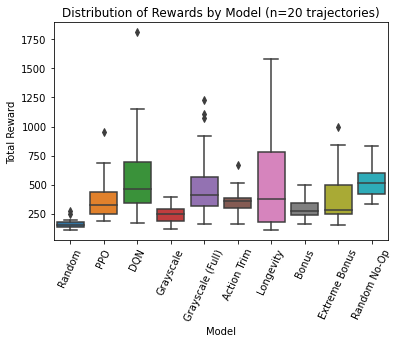

In [28]:
plt.title('Distribution of Rewards by Model (n=20 trajectories)')
sns.boxplot(x = df_plt['Scenario'], y = df_plt['Reward'])
# sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=65)
plt.ylabel('Total Reward')
plt.xlabel('Model')
plt.savefig('final_rewards_dist_all.png')

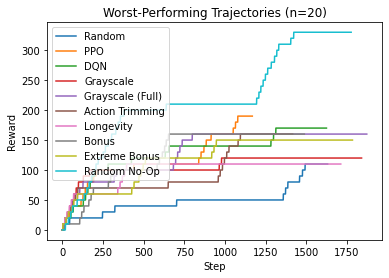

In [29]:
plt.title('Worst-Performing Trajectories (n=20)')
plt.plot(random_bad, label='Random')
plt.plot(ppo_bad, label='PPO')
plt.plot(dqn_bad, label='DQN')
plt.plot(dqn_grayscale_bad, label='Grayscale')
plt.plot(dqn_grayscale_fullres_bad, label='Grayscale (Full)')
plt.plot(dqn_action_slim_bad, label='Action Trimming')
plt.plot(dqn_longevity_bad, label='Longevity')
plt.plot(dqn_bonus_bad, label='Bonus')
plt.plot(dqn_extreme_bad, label='Extreme Bonus')
plt.plot(dqn_noop_565_bad, label='Random No-Op')
# sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Step')
plt.ylabel('Reward')
plt.legend()
plt.savefig('final_worst_traj.png')

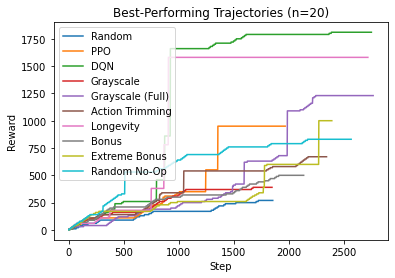

In [30]:
plt.title('Best-Performing Trajectories (n=20)')
plt.plot(random_good, label='Random')
plt.plot(ppo_good, label='PPO')
plt.plot(dqn_good, label='DQN')
plt.plot(dqn_grayscale_good, label='Grayscale')
plt.plot(dqn_grayscale_fullres_good, label='Grayscale (Full)')
plt.plot(dqn_action_slim_good, label='Action Trimming')
plt.plot(dqn_longevity_good, label='Longevity')
plt.plot(dqn_bonus_good, label='Bonus')
plt.plot(dqn_extreme_good, label='Extreme Bonus')
plt.plot(dqn_noop_565_good, label='Random No-Op')
# sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Step')
plt.ylabel('Reward')
plt.legend()
plt.savefig('final_best_traj.png')

In [18]:
# metrics_path = '/project/logs/DQN/20221106_193517/'

In [19]:
# with open(os.path.join(metrics_path, 'metrics.pickle'), 'rb') as pkl:
#         metrics = pickle.load(pkl)

In [20]:
# metrics = [metric[265:] for metric in metrics]

In [21]:
# traj_rewards = []
# for traj in metrics:
#     rewards = 0
#     for step in traj:
#         rewards += step[0]
#         if step[0] != 0:
#             print(step, step[0])
#     traj_rewards.append(rewards)

In [46]:
# steps_to_term = [len(metrics[i]) for i in range(len(metrics))]

In [47]:
# steps_to_term.sort()

In [43]:
# steps_to_term

In [22]:
# rewards_agg = []
# for traj in metrics:
#     rewards = [step[0] for step in traj[0:1000]]
#     rewards_agg.append(rewards)

In [23]:
# rewards_agg = np.array(rewards_agg)

In [24]:
# rewards_agg.shape

In [25]:
# len(rewards_agg)

In [26]:
# rewards_avg = rewards_agg.cumsum(axis=1).sum(axis=0) / len(rewards_agg)

In [27]:
# rewards_std = rewards_agg.std(axis=0)

In [28]:
# steps = np.linspace(1, len(rewards_avg), num=1000)

In [29]:
# steps = np.linspace(0, 1000, 11)

In [30]:
# filter_indices = [0,99,199,299,399,499,599,699,799,899,999]

In [31]:
# rewards_plt = rewards_avg[filter_indices]

In [32]:
# std_plt = rewards_std[filter_indices]

In [33]:
# rewards_std

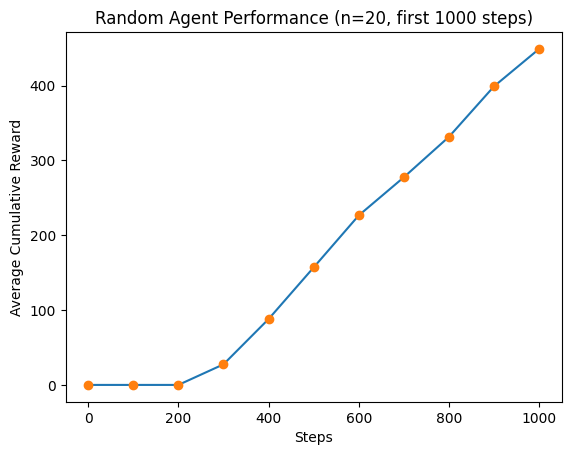

In [36]:
# plt.title('Random Agent Performance (n=20, first 1000 steps)')
# plt.xlabel('Steps')
# plt.ylabel('Average Cumulative Reward')
# plt.plot(steps, rewards_plt)
# plt.errorbar(steps, rewards_plt, yerr = std_plt, fmt ='o')
# plt.savefig('random_agent_performance.png')